In [1]:
import Acquire as a
import prepare as p
import wrangle as w
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = p.prepare(a.acquire_data())
train, validate, test = p.split(df)

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_of_wine
3737,5.5,0.24,0.32,8.70,0.060,19.0,102.0,0.99400,3.27,0.31,10.4,5,White
19,7.9,0.32,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,Red
2200,7.2,0.24,0.40,1.40,0.045,31.0,106.0,0.99140,2.88,0.38,10.8,6,White
4139,9.0,0.29,0.34,12.10,0.030,34.0,177.0,0.99706,3.13,0.47,10.6,5,White
501,10.4,0.44,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,Red


In [4]:
p.overview(train)

--- Shape: (3637, 13)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3637 entries, 3737 to 548
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3637 non-null   float64
 1   volatile_acidity      3637 non-null   float64
 2   citric_acid           3637 non-null   float64
 3   residual_sugar        3637 non-null   float64
 4   chlorides             3637 non-null   float64
 5   free_sulfur_dioxide   3637 non-null   float64
 6   total_sulfur_dioxide  3637 non-null   float64
 7   density               3637 non-null   float64
 8   pH                    3637 non-null   float64
 9   sulphates             3637 non-null   float64
 10  alcohol               3637 non-null   float64
 11  quality               3637 non-null   int64  
 12  type_of_wine          3637 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 397.8+ KB
--- Column Descriptions
      

# Univariate analysis

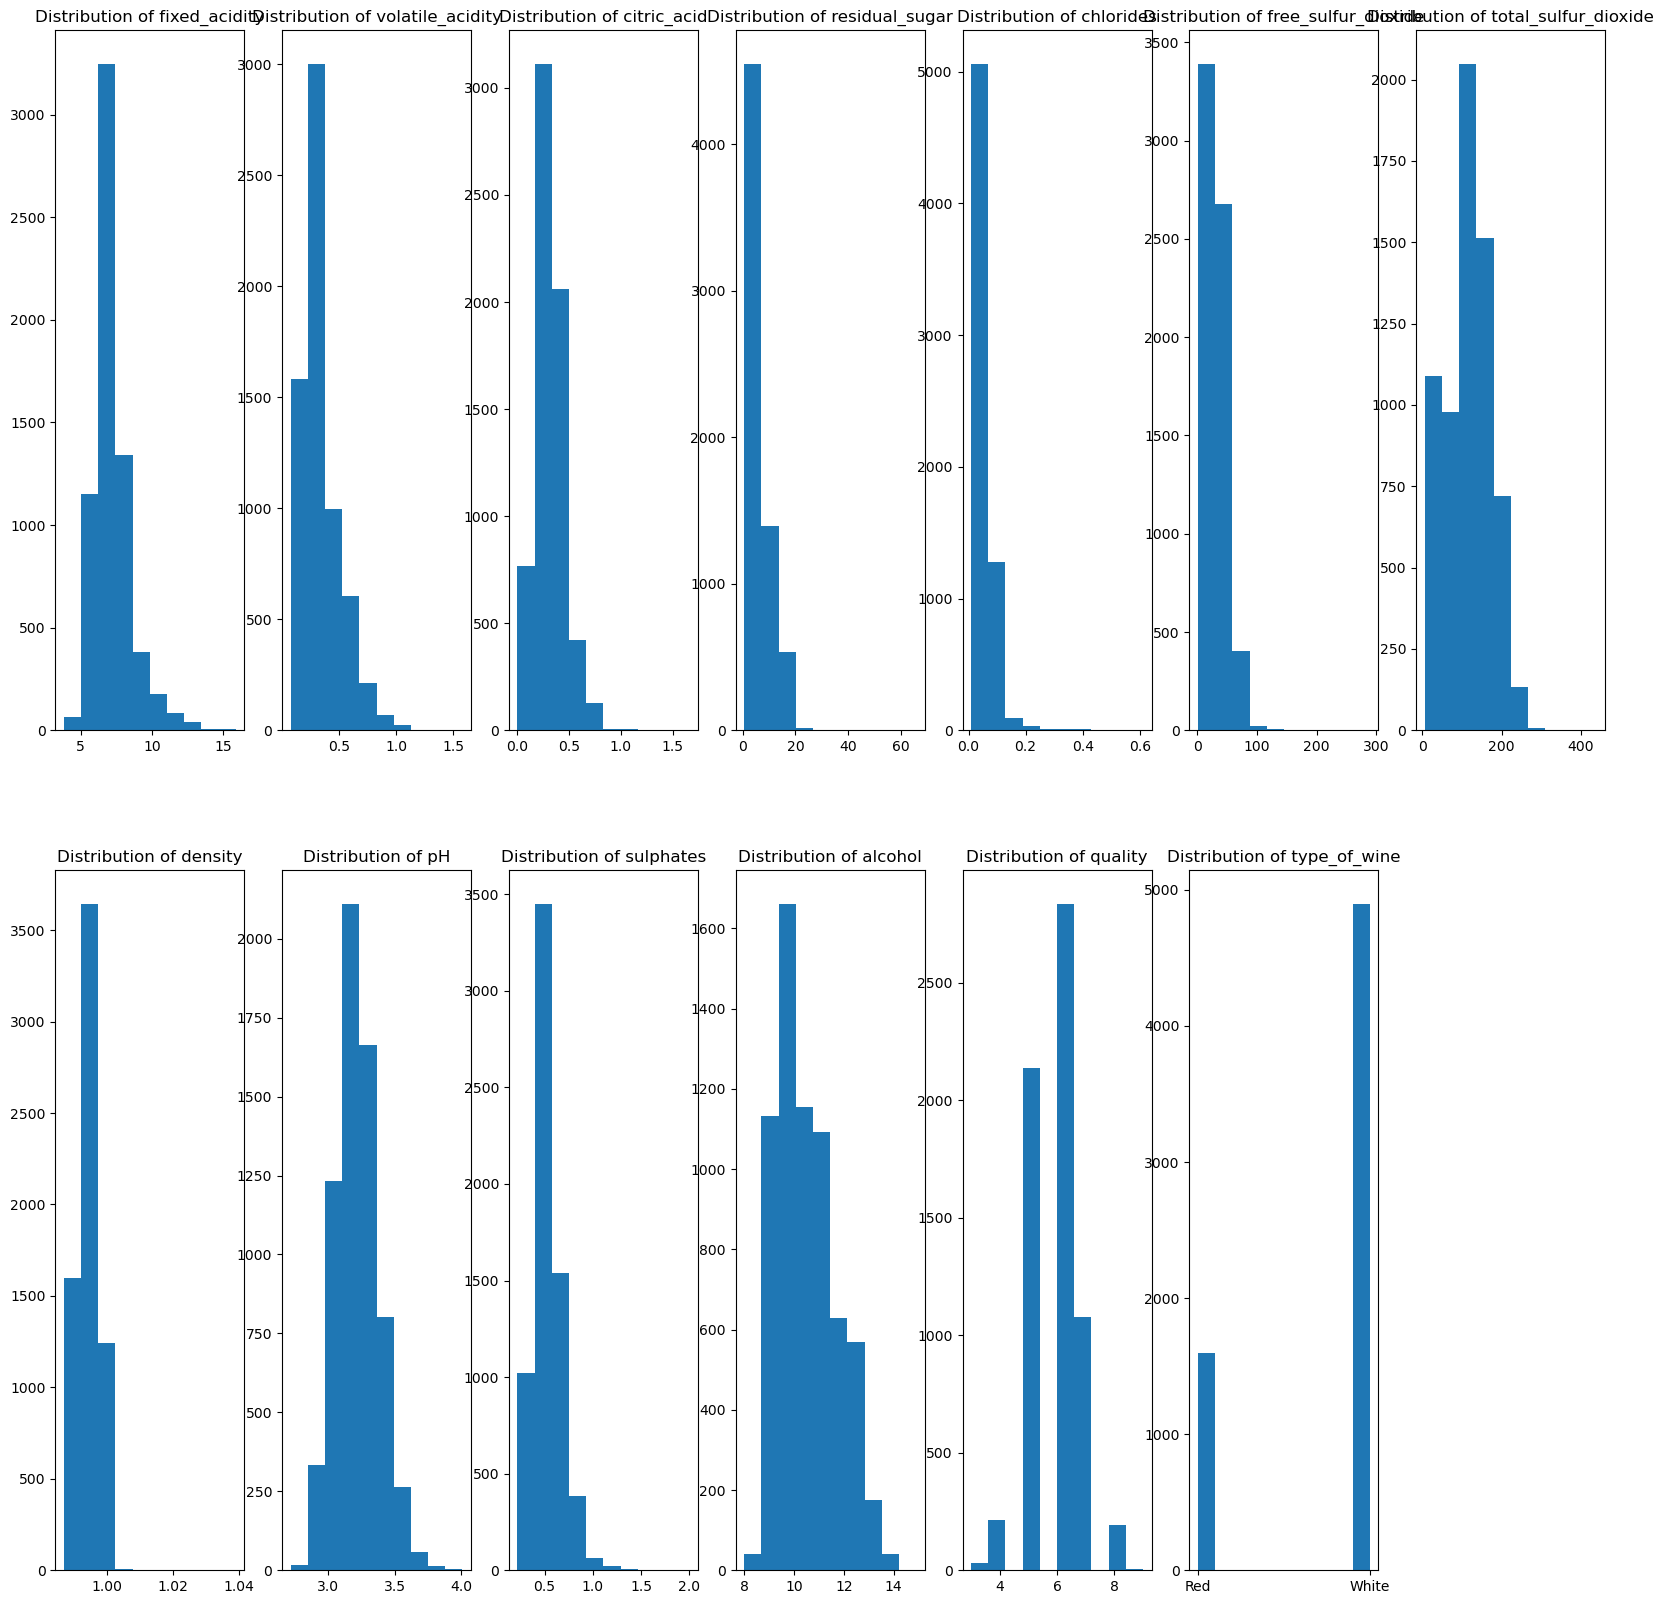

In [5]:
cols = df.columns.to_list()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(2, round(len(cols) /2) +1, plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
plt.show()

In [6]:
box_cols = df.drop(columns='type_of_wine').columns.to_list()

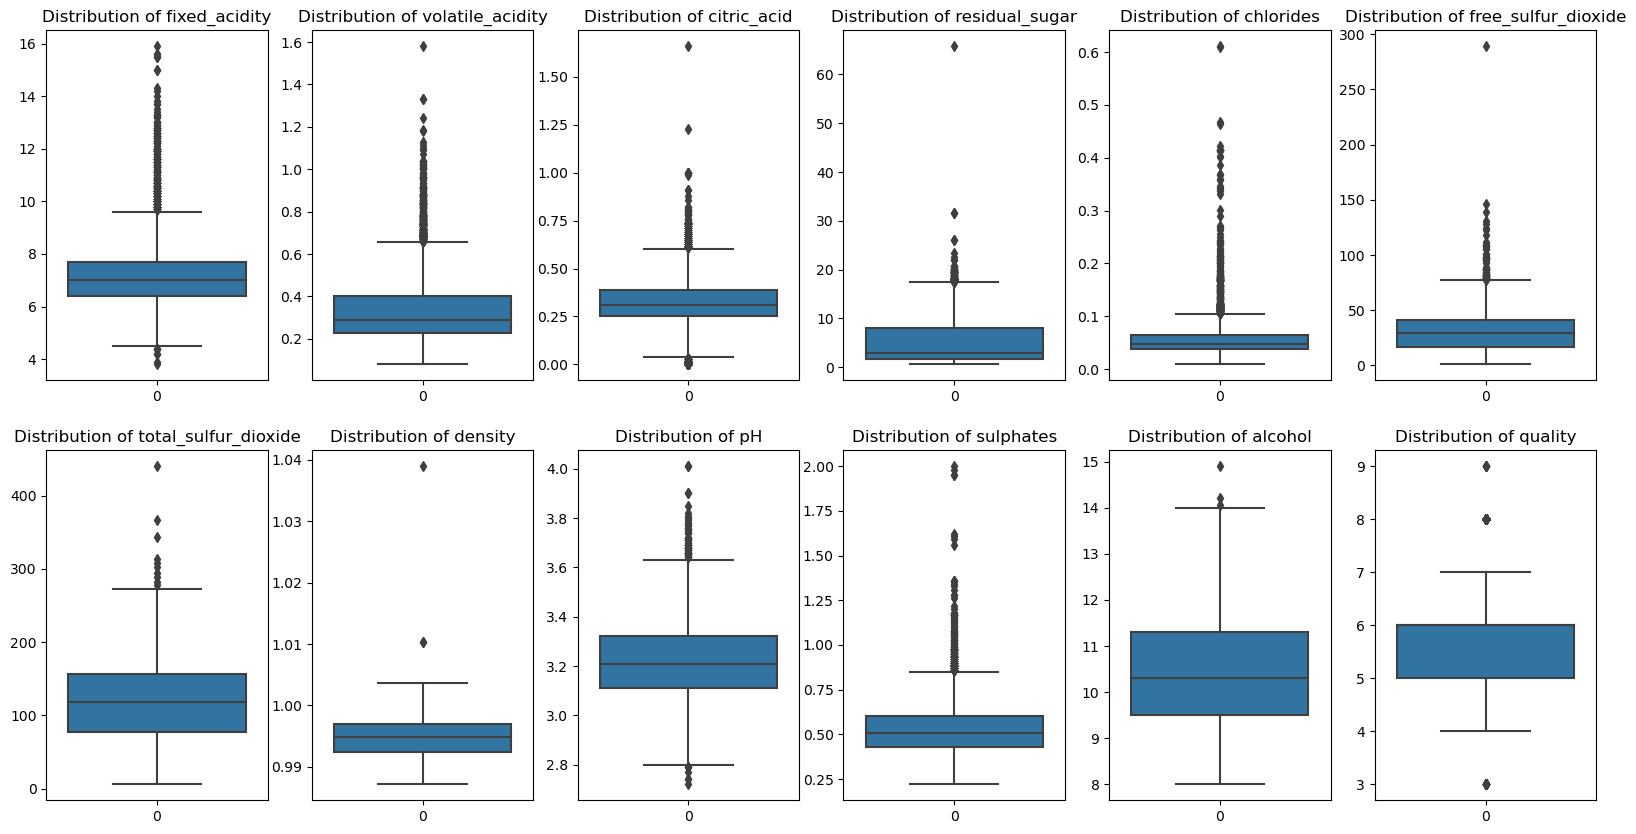

In [7]:
plt.figure(figsize=(20,10))
for i, col in enumerate(box_cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(2, round(len(cols) /2), plot_number)
    plt.title(f'Distribution of {col}')
    plt.grid(False)
    sns.boxplot(data=df[col])
plt.show()

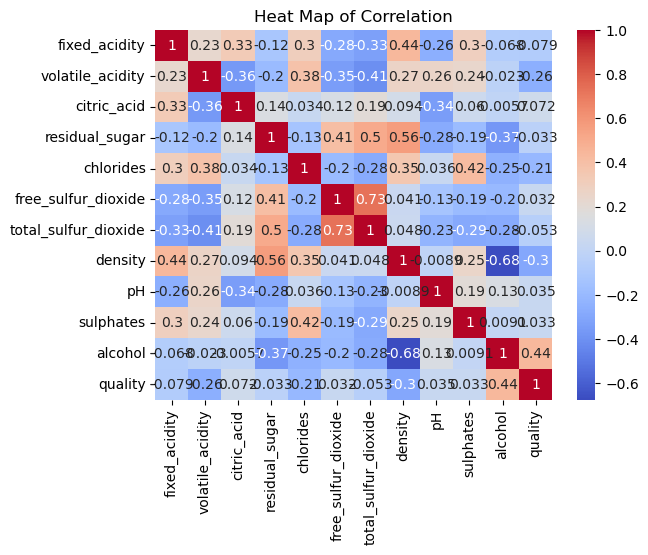

In [8]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlation')
plt.show()

In [9]:
def get_pairplot(df):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    sample = df.sample(500)
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    plt.show()

In [10]:
# get_pairplot(train)

### Looks like strong correlations to quality on 'volatile acidity', 'chlorides', 'density' and 'alcohol'

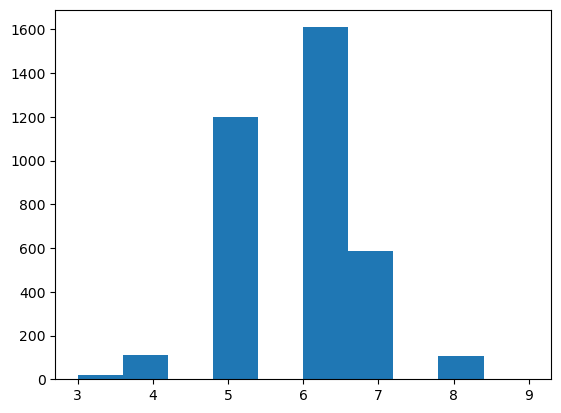

In [11]:
plt.hist(data=train, x='quality');

quality is not very normally distributed

## Does 'volatile acidity' have a correlation with quality?

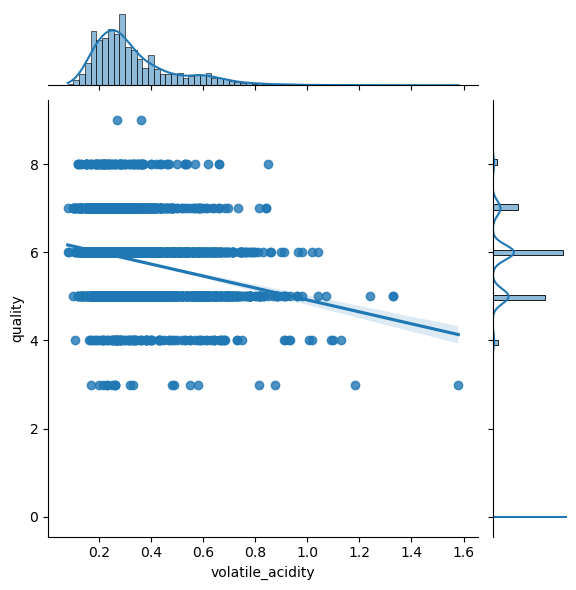

In [12]:
sns.jointplot(data=train, x='volatile_acidity', y='quality', kind='reg')
plt.axhline()
plt.show()

Is there a statistial correlation?
- volatile acidity is a continuous variable with right skew
- quality appears to be a ordinal variable 
- we are looking to do a spearman test

In [13]:
def check_hypothesis(data, x, y, α=0.05, test=stats.pearsonr):
    r, p = test(data[x], data[y])
    if p < α:
        print(f"The correlation coefficient between \
{x} and {y} is {r:.2f} with a p-value of {p:.2f}")
        print(f"Since the p-value is less than {α}, \n\
we can reject the null hypothesis and conclude that {x} and {y} are correlated.")
        print('_______________________________________________________')
    else:
        print(f"Since the p-value is greater than or equal to {α}, \n\
we fail to reject the null hypothesis and conclude \n\
that there is insufficient evidence to suggest a correlation between {x} and {y}.")
        print('_______________________________________________________')

In [14]:
# r, p = stats.spearmanr(train.quality, train['volatile acidity'])
check_hypothesis(train, 'quality', 'volatile_acidity', test=stats.spearmanr)

The correlation coefficient between quality and volatile_acidity is -0.25 with a p-value of 0.00
Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and volatile_acidity are correlated.
_______________________________________________________


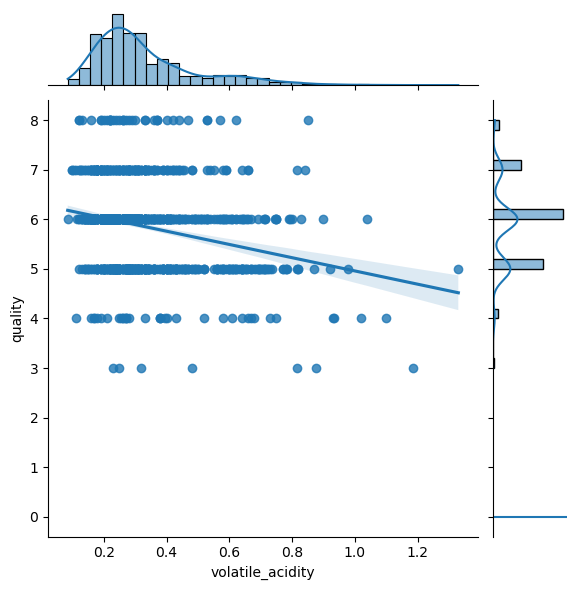

In [15]:
sns.jointplot(data=train.sample(1000), x='volatile_acidity', y='quality', kind='reg')
plt.axhline()
plt.show()

In [16]:
X_train = train.drop(columns='quality')
y_train = train.quality

X_validate = validate.drop(columns='quality')
y_validate = validate.quality 

X_test = test.drop(columns='quality')
y_test = test.quality

#there was a typo on these, capital X_train is called, but lowercase x_train was created

In [17]:
num_cols = []
obj_cols = []

for cols in train.columns:
    if any (train[cols] != 'Object'):
        num_cols.append(cols)
    else:
        obj_cols.append(cols)
num_cols.remove('type_of_wine')

In [18]:
df[num_cols].head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
# scaled_data = scaler.fit_transform(fit_data,y=y_train)
train_scaled, validate_scaled, test_scaled = w.scale_data(train, 
               validate, 
               test)

In [22]:
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_of_wine
3737,0.140496,0.106667,0.192771,0.124233,0.080268,0.062500,0.219400,0.132832,0.417323,0.050562,0.347826,5,White
19,0.338843,0.160000,0.307229,0.018405,0.550167,0.055556,0.113164,0.188741,0.236220,0.483146,0.173913,6,Red
2200,0.280992,0.106667,0.240964,0.012270,0.055184,0.104167,0.228637,0.082707,0.110236,0.089888,0.405797,6,White
4139,0.429752,0.140000,0.204819,0.176380,0.030100,0.114583,0.392610,0.191826,0.307087,0.140449,0.376812,5,White
501,0.545455,0.240000,0.439759,0.091258,0.103679,0.128472,0.159353,0.229227,0.338583,0.353933,0.579710,7,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,0.107438,0.086667,0.168675,0.012270,0.058528,0.163194,0.325635,0.088105,0.598425,0.151685,0.347826,5,White
3542,0.206612,0.113333,0.265060,0.168712,0.048495,0.163194,0.434180,0.186813,0.346457,0.168539,0.217391,5,White
1884,0.289256,0.160000,0.150602,0.101227,0.073579,0.159722,0.399538,0.173318,0.267717,0.140449,0.115942,5,White
2206,0.289256,0.113333,0.174699,0.105828,0.061873,0.128472,0.348730,0.181029,0.543307,0.089888,0.231884,5,White


In [23]:
from sklearn.cluster import KMeans
import pandas as pd
cluster_vars = ['alcohol', 'density', 'quality']

In [24]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train)
#i think this part might need to be X_train[cluster_vars],
# otherwise it is looking at clustering all of the columns together

        
        
        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

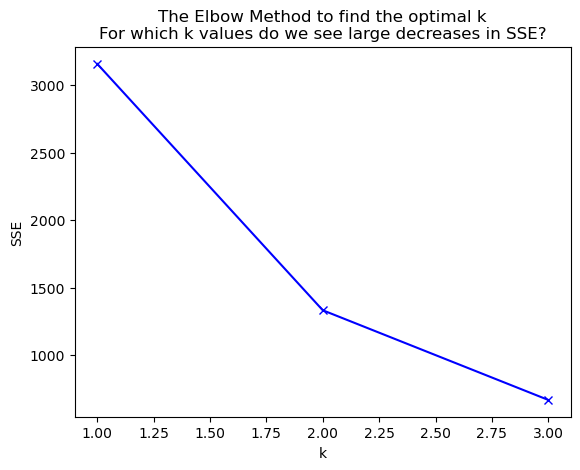

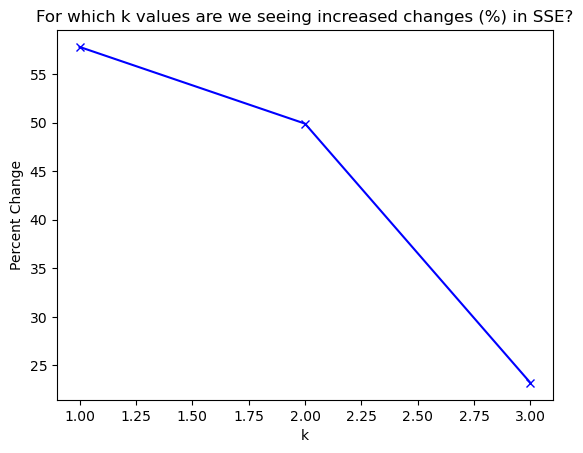

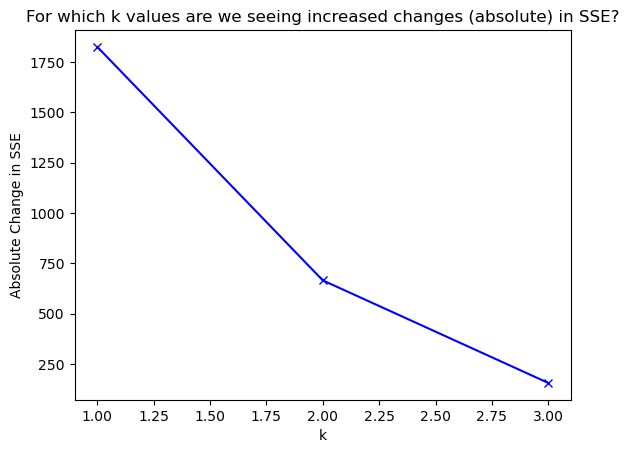

,k,sse,delta,pct_delta
0,1,3158.798539,1826.0,57.8
1,2,1332.476544,665.0,49.9
2,3,667.805523,155.0,23.2


In [46]:
# train_scaled = train_scaled.drop(columns='type_of_wine')
k_range = [1, 2, 3, 4]  
#i think that using a larger range(20) would give a better curve to the plot, 
# and make it easier to spot the elbow
cluster_vars = [X_train.columns.tolist()] 
# i think that by grabing all off the columns at once it is trying to lump 
# all of the columns together at once, 
# might need to try it only on 2-4 columns at once
find_k(X_train, cluster_vars, k_range)



In [34]:
X_train = train_scaled.drop(columns='type_of_wine')
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3737,0.140496,0.106667,0.192771,0.124233,0.080268,0.062500,0.219400,0.132832,0.417323,0.050562,0.347826,5
19,0.338843,0.160000,0.307229,0.018405,0.550167,0.055556,0.113164,0.188741,0.236220,0.483146,0.173913,6
2200,0.280992,0.106667,0.240964,0.012270,0.055184,0.104167,0.228637,0.082707,0.110236,0.089888,0.405797,6
4139,0.429752,0.140000,0.204819,0.176380,0.030100,0.114583,0.392610,0.191826,0.307087,0.140449,0.376812,5
501,0.545455,0.240000,0.439759,0.091258,0.103679,0.128472,0.159353,0.229227,0.338583,0.353933,0.579710,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4918,0.107438,0.086667,0.168675,0.012270,0.058528,0.163194,0.325635,0.088105,0.598425,0.151685,0.347826,5
3542,0.206612,0.113333,0.265060,0.168712,0.048495,0.163194,0.434180,0.186813,0.346457,0.168539,0.217391,5
1884,0.289256,0.160000,0.150602,0.101227,0.073579,0.159722,0.399538,0.173318,0.267717,0.140449,0.115942,5
2206,0.289256,0.113333,0.174699,0.105828,0.061873,0.128472,0.348730,0.181029,0.543307,0.089888,0.231884,5


In [35]:
from sklearn.cluster import KMeans
import pandas as pd

def cluster_columns(scaled_df, n_clusters):
    # Initialize an empty dictionary to store the cluster labels for each column
    clusters_dict = {}

    # Loop over each column in the scaled DataFrame
    for col in scaled_df.columns:
        # Initialize a k-means model with n_clusters
        kmeans = KMeans(n_clusters=n_clusters)

        # Fit the model to the column data
        kmeans.fit(scaled_df[col].values.reshape(-1, 1))

        # Get the cluster labels for each data point in the column
        col_clusters = kmeans.labels_

        # Add the cluster labels to the clusters_dict with the column name as the key
        clusters_dict[col] = col_clusters

    # Create a new DataFrame from the clusters_dict
    clusters_df = pd.DataFrame(clusters_dict)

    # Return the clusters_df
    return clusters_df


In [36]:
cluster_df = cluster_columns(scaled_df=X_train, n_clusters=2)

In [38]:
new_col_name = ['fixed_acidity_cluster_number', 'volatile_acidity_cluster_number', 'citric_acid_cluster_number', 'residual_sugar_cluster_number',
       'chlorides_cluster_number', 'free_sulfur_dioxide_cluster_number', 'total_sulfur_dioxide_cluster_number', 'density_cluster_number',
       'pH_cluster_number', 'sulphates_cluster_number', 'alcohol_cluster_number', 'quality_cluster_number']

cluster_df.columns = new_col_name

In [39]:
acidity_cluster = cluster_df[['fixed_acidity_cluster_number']]
acidity_normal = train.fixed_acidity

In [44]:
pd.merge([acidity_normal, acidity_cluster],right_on=index)


NameError: name 'index' is not defined